In [1]:
import tensorflow as tf
print(tf.__version__)

1.14.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model

model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(16, activation='relu'),
                    Dense(16, activation='relu'),
                    Dense(10, activation='softmax')
                    
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [6]:
model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(16, activation='relu', name='layer_1'),
                    Dense(16, activation='relu'),
                    Dense(10),
                    Softmax()
                    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                170       
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [8]:
# Build the Sequential convolutional neural network model
# Idea: https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=(28, 28, 1), activation='linear', padding='same', data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
# Print the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1296)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                83008     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 83,818
Trainable params: 83,818
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [10]:
# Define the model optimizer, loss function and metrics
#model.compile(loss=tf.keras.losses.MeanSquaredError(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='Adam'),metrics=['accuracy'])

In [11]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', 'AUC'])

In [12]:
# Print the resulting model attributes

print(model.loss)
print(model.optimizer)
print(model.metrics)


binary_crossentropy
[<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x00000295BD88F0F0>, <tensorflow.python.keras.metrics.AUC object at 0x00000295BD937D68>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [13]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [14]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [15]:
# Print the shape of the training data
print(train_images.shape)
print(train_labels.shape)


(60000, 28, 28)
(60000,)


In [16]:
rescale1=train_images.reshape(-1,28,28,1)
rescale2=test_images.reshape(-1,28,28,1)
print(train_images.shape)
print(test_images.shape)


(60000, 28, 28)
(10000, 28, 28)


In [17]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [18]:
# Rescale the image values so that they lie in between 0 and 1.
"""Is it this step is Normalization?"""
rescale1 = rescale1/255.0
rescale2= rescale2/255.0
#------------
from keras.utils import to_categorical
train_Y = to_categorical(train_labels)
test_Y = to_categorical(test_labels)

Using TensorFlow backend.


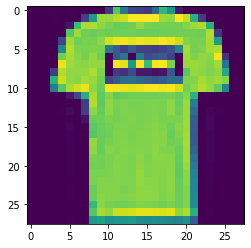

In [19]:
# Display one of the images
plt.imshow(train_images[1])


#### Fit the model

In [20]:
# Fit the model
make_model=model.fit(rescale1, train_Y, epochs=6)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/6
60000/60000 [==============================] - 14s 230us/sample - loss: 0.0785 - acc: 0.9692 - auc: 0.9873
Epoch 2/6
60000/60000 [==============================] - 14s 230us/sample - loss: 0.0562 - acc: 0.9779 - auc: 0.9930
Epoch 3/6
60000/60000 [==============================] - 14s 226us/sample - loss: 0.0492 - acc: 0.9808 - auc: 0.9946
Epoch 4/6
60000/60000 [==============================] - 13s 225us/sample - loss: 0.0444 - acc: 0.9827 - auc: 0.9955
Epoch 5/6
60000/60000 [==============================] - 14s 227us/sample - loss: 0.0405 - acc: 0.9842 - auc: 0.9962
Epoch 6/6
60000/60000 [==============================] - 13s 220us/sample - loss: 0.0381 - acc: 0.9850 - auc: 0.9965


#### Plot training history

In [21]:
# Load the history into a pandas Dataframe
history = pd.DataFrame(make_model.history)
print(history)
history.describe()


       loss       acc       auc
0  0.078511  0.969199  0.987276
1  0.056224  0.977926  0.993024
2  0.049217  0.980792  0.994578
3  0.044417  0.982651  0.995498
4  0.040492  0.984163  0.996210
5  0.038060  0.985036  0.996475


,loss,acc,auc
count,6.000000,6.000000,6.000000
mean,0.051153,0.979961,0.993844
std,0.014889,0.005853,0.003453
min,0.038060,0.969199,0.987276
25%,0.041473,0.978643,0.993413
50%,0.046817,0.981722,0.995038
75%,0.054472,0.983785,0.996032
max,0.078511,0.985036,0.996475


Text(0, 0.5, 'Loss value')

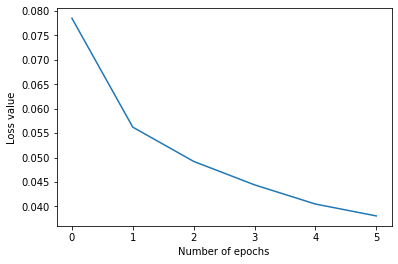

In [22]:
# Make a plot for the loss

plt.plot(history['loss'])
plt.xlabel('Number of epochs')
plt.ylabel('Loss value')

Text(0, 0.5, 'Accuracy value')

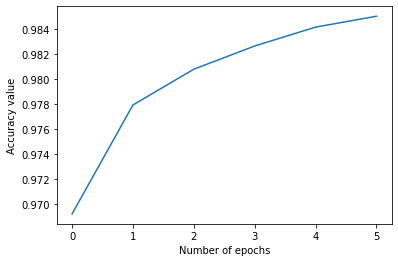

In [23]:
# Make a plot for the accuracy
plt.plot(history['acc'])
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy value')

Text(0, 0.5, 'Accuracy value')

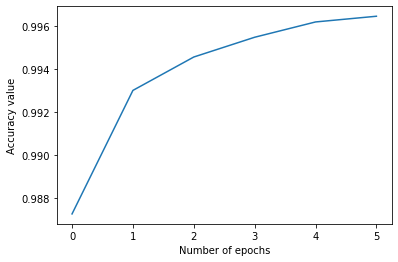

In [24]:
# Make a plot for the additional metric
plt.plot(history['auc'])
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy value')

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [25]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [26]:
# Evaluate the model

result= model.evaluate(rescale2,test_Y)
print('Loss',result[0])
print('Accuracy',result[1])


10000/10000 [==============================] - 1s 103us/sample - loss: 0.0461 - acc: 0.9822 - auc: 0.9945
Loss 0.04611202901154757
Accuracy 0.98224074


#### Make predictions from the model

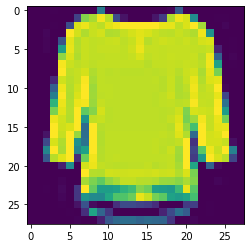

Label: Shirt


In [27]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [28]:
# Get the model predictions
pic = rescale2[random_inx].reshape(-1,28,28,1)

predict = np.argmax(model.predict(pic))
labels[predict]

'Shirt'